# Map projections and making your birthquake map [25 points]

Read Chapter 1.3 of the course web-book on map projections.

## First make a copy of this notebook and rename it to EPS88_W1_FirstName_LastName

1. From 'File' choose 'Make a copy'
2. From 'File' chose 'Rename' and rename as described above

## Let's make your first map! [5 points]

We are going to use ```cartopy``` in conjunction with ```matplotlib``` to make maps. ```cartopy``` can transform points, lines and images into different map projections. ```matplotlib``` provides tools to visualize these projections. We will import them using the standard conventions. **You must press play (or more efficiently shift+enter) on the cell that imports these function libraries for the rest of the code to work.**

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

The syntax of using these functions takes some getting used to. Here we will make a figure, create an axis object with a defined projection, and then plot coastlines and a stock image that shows elevation.

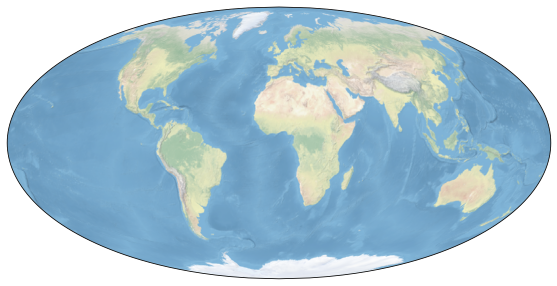

In [2]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

Let's plot the location of Berkeley on a map. First we want to assign the latitude (37.8715) and longitude (-122.2730) of Berkeley to variables:

In [3]:
Berkeley_latitude = 37.8715
Berkeley_longitude = -122.2730

Now we can use the ```plt.scatter``` function to plot the location of Berkeley. We give the ```plt.scatter``` function ```Berkeley_longitude``` as the x-value, ```Berkeley_latitude``` as the y-value while also telling it to transform it into map coordinates (```transform=ccrs.PlateCarree()```) and to make the point red (```color='red'```). We can save the figure using ```plt.savefig()``` putting the name of the file with the extension within the ``()``. In this case, let's call it ```'Mollweide_projection_w_Berkeley.png'```

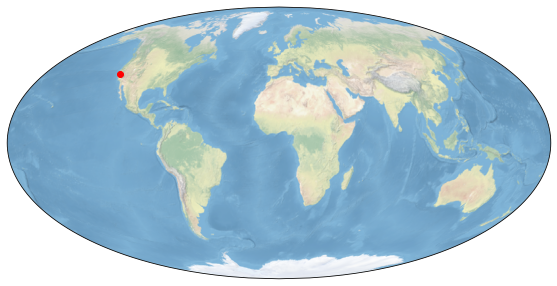

In [4]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.scatter(Berkeley_longitude, Berkeley_latitude, transform=ccrs.PlateCarree(), color='red')
plt.savefig('Mollweide_projection_w_Berkeley.png')

Revisit your notebook from in class when you found your birthquake and enter the latitude of longitude in the cell below assigning them to ```birthquake_latitude``` and ```birthquake_longitude```.

In [5]:
birthquake_latitude = 30.0
birthquake_longitude = 30.0

Now you can use the cell below to make a map that plots both Berkeley and your birthquake location as well as the shortest line between them. 

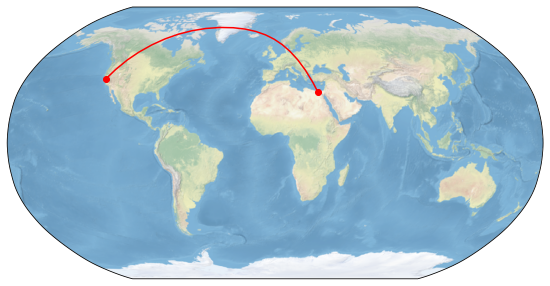

In [6]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()
plt.scatter([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.PlateCarree(), color='red')
plt.plot([Berkeley_longitude, birthquake_longitude], [Berkeley_latitude, birthquake_latitude], transform=ccrs.Geodetic(), color='red')
plt.show()

## Test different map projections [5 points]


/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fac574cb4a0> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


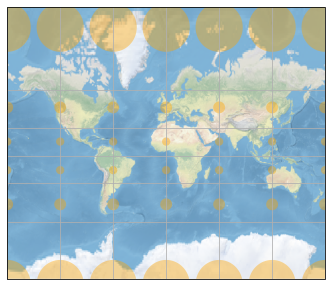

In [7]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mercator())

ax.stock_img()
ax.gridlines()

# add equal area circles to see how they are distorted by the projection
ax.tissot(facecolor='orange', alpha=0.4) #alpha set the transparency

plt.show()

Change the projection (by **replacing** the '___') and see how it compares. A list of possible `cartopy` projections is [here](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

/Users/ddreger/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7fac4105c720> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


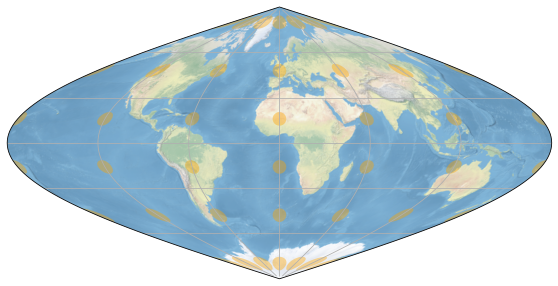

In [8]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Sinusoidal())

ax.stock_img()
ax.gridlines()

# add equal area circles to see how they are distorted by the projection
ax.tissot(facecolor='orange', alpha=0.4) #alpha set the transparency

plt.show()

## Make a map of 5 largest birthdate earthquakes [10 points]

Use the code cells below to make another map where you plot the locations of the 5 largest magnitude earthquakes that occured on the day you were born (use any projection you like). When you have made this map, save it as a .png file and submit your notebook to Ok. Choose any projection you want (https://scitools.org.uk/cartopy/docs/latest/crs/projections.html). You can see that the example above use Robinson and Mollweide. Note depending on the seismicity of the day you may have less than 5 events.

In [9]:
Dreger_birthday = '1963-01-23'
day_after_Dreger_birthday = '1963-01-24'
standard_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=magnitude'
Dreger_birthquake_url = standard_url + '&starttime=' + Dreger_birthday + '&endtime=' + day_after_Dreger_birthday
Dreger_birthday_earthquakes = pd.read_csv(Dreger_birthquake_url)
eq_longitudes = Dreger_birthday_earthquakes[:5]['longitude']
eq_latitudes = Dreger_birthday_earthquakes[:5]['latitude']

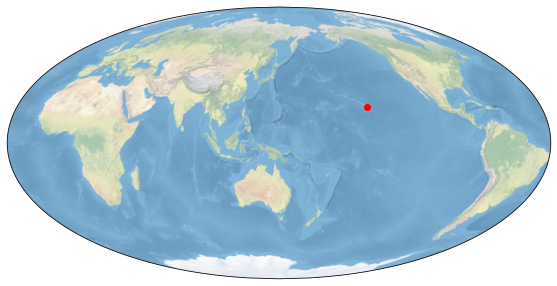

In [10]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=145))
ax.stock_img()
plt.scatter(eq_longitudes, eq_latitudes, transform=ccrs.PlateCarree(), color='red')
plt.savefig('Top5_birthquakes.png')

### Turn in this notebook

Save your completed notebook then:

1. From the 'File' pull down menu choose 'Download As'
2. Download as both Notebook (.ipynb) AND as a PDF (.pdf)
3. Submit both the .ipynb and .pdf files, appropriately named to the bcourses assignment page by the due date